In [13]:
import numpy as np
import pandas as pd 
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [14]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [15]:
filenames = os.listdir("C:/Users/91809/Desktop/ARKS/05_ARKS_Early-Prediction-of-Autism-Disorder/AutismDataset/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'Autistic':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [16]:
df.head()

,filename,category
0,Autistic.0.jpg,1
1,Autistic.1.jpg,1
2,Autistic.10.jpg,1
3,Autistic.100.jpg,1
4,Autistic.1000.jpg,1


In [17]:
df.tail()

,filename,category
2535,Non_Autistic.995.jpg,0
2536,Non_Autistic.996.jpg,0
2537,Non_Autistic.997.jpg,0
2538,Non_Autistic.998.jpg,0
2539,Non_Autistic.999.jpg,0


In [22]:
import os

# Directory path
directory_path = "C:/Users/91809/Desktop/ARKS/05_ARKS_Early-Prediction-of-Autism-Disorder/AutismDataset/train"

# Sample filename
sample = random.choice(filenames)  # Make sure sample contains the filename you want to load

# Create the full file path
file_path = os.path.join(directory_path, sample)

# Now load the image
image = load_img(file_path)


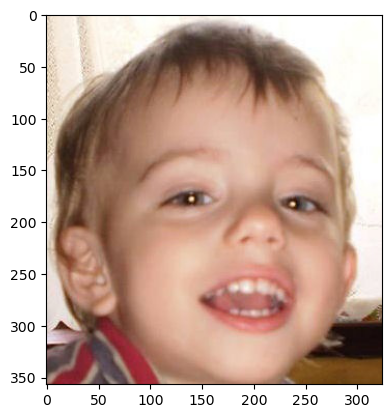

In [23]:
plt.imshow(image)

In [24]:
# CNN model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

In [25]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [26]:
# patience value
earlystop = EarlyStopping(patience=10)

In [27]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [28]:
callbacks = [earlystop, learning_rate_reduction]

In [29]:
# Data preparation for training
df["category"] = df["category"].replace({0: 'Non_Autistic', 1: 'Autistic'}) 